### description

In [1]:
import os
# inputfiles are available in the '~/E:/database/Personal_medicine/" directory
user_folder = os.path.expanduser('~')
data_folder = os.path.join(user_folder, 'E:/git/database/Personal_medicine')
os.listdir(data_folder)

['stage1_solution_filtered.csv',
 'stage1_solution_filtered.csv.7z',
 'test_text',
 'test_text.zip',
 'test_variants',
 'test_variants.zip',
 'training_text',
 'training_text.zip',
 'training_variants',
 'training_variants.zip']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [3]:
train_variants_df = pd.read_csv(os.path.join(data_folder, 'training_variants'))
test_variants_df = pd.read_csv(os.path.join(data_folder, 'test_variants'))
train_text_df = pd.read_csv(os.path.join(data_folder, 'training_text'), sep='\|\|', engine='python',header=None, skiprows=1, names=['ID','Text'])
test_text_df = pd.read_csv(os.path.join(data_folder, 'test_text'), sep='\|\|', engine='python',header=None, skiprows=1, names=['ID','Text'])
print([train_variants_df.columns, train_text_df.columns])

[Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object'), Index(['ID', 'Text'], dtype='object')]


In [4]:
train_df = pd.merge(train_text_df, train_variants_df, on='ID')
test_df = pd.merge(test_text_df, test_variants_df, on='ID')
del train_text_df, train_variants_df, test_text_df, test_variants_df

In [5]:
print("The shape of train_df is: %s" %(train_df.shape,))
print("The shape of test_df is: %s" %(test_df.shape,))

The shape of train_df is: (3321, 5)
The shape of test_df is: (5668, 4)


In [6]:
train_df.head(3)

,ID,Text,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2


In [7]:
train_df.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

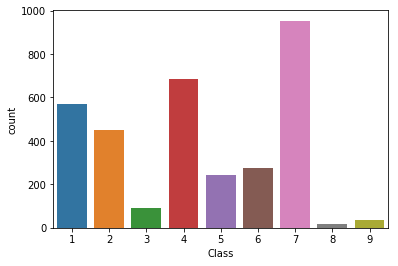

In [8]:
sns.countplot(x = 'Class', data=train_df)
plt.show()

### Task: multiple class classification

In [9]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train, test = train_test_split(train_df, test_size=0.2)
train.head()

,ID,Text,Gene,Variation,Class
2401,2401,"RasGAPs supply a catalytic residue, termed th...",NF1,R1276P,4
2088,2088,Argonaute (Ago) 2 is the catalytic engine of m...,AGO2,Amplification,2
1686,1686,A considerable number of patients with metasta...,FLT3,Amplification,7
53,53,The receptor protein tyrosine phosphatase T (P...,PTPRT,N510K,1
1283,1283,Background: In numerous biological events the ...,HRAS,Q61H,2


In [10]:
X_train = train['Text'].values
y_train = train['Class'].values
X_test = test['Text'].values
y_test = test['Class'].values

#### Kaggle比赛大多使用了boosting，常见的boosting有
[http://www.360doc.com/content/18/0101/17/40769523_718161675.shtml](http://www.360doc.com/content/18/0101/17/40769523_718161675.shtml)
1. AdaBoost
2. GBDT
3. XGBoost
4. [LightGBM](https://www.jianshu.com/p/48e82dbb142b)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

In [15]:
svc = svm.LinearSVC()
rfc = RandomForestClassifier()
etrc = ExtraTreesClassifier()
xgbc = xgb.XGBClassifier()
lgbc = lgb.LGBMClassifier()
clf = [svc, rfc]

In [13]:
for i in clf:
    text_clf = Pipeline([('vect', TfidfVectorizer(lowercase=True, stop_words="english", encoding='utf-8')),
                        ('tfidf', TfidfTransformer()),
                        ('clf', i)
                        ])
    text_clf = text_clf.fit(X_train, y_train)
    y_test_predicted = text_clf.predict(X_test)
    acc = np.mean(y_test_predicted == y_test)
    print('accuracy of %s is %s' %(i, acc))

ValueError: np.nan is an invalid document, expected byte or unicode string.